![Matplotlib](images/matplotlib_logo-s.png)

# Matplotlib

Let's take a quick look at the matplotlib essentials.

First let's import the neccesary modules:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

And now let's go with some examples.

## 1D plot

A tangent between 0 and 4$\pi$.

$$y = \tan(x), \; x\in[0., 4\pi]$$

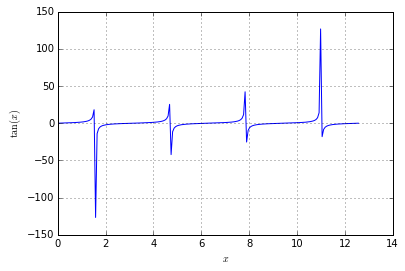

In [2]:
x = np.linspace( 0., 4.*np.pi, num=200 )
y = np.tan(x)

plt.plot(x, y)

plt.xlabel(r'$x$')        #using LaTeX syntax
plt.ylabel(r'$\tan(x)$')
plt.grid(True)
#plt.savefig('tan.png')

## 1D polar plot 

$\theta(\rho) = 2\pi \rho, \; \rho \in [0, 2]$

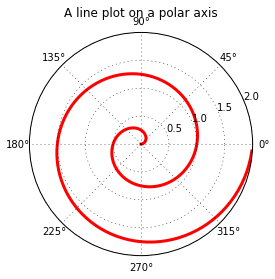

In [3]:
r = np.arange(0, 2., 0.01)
theta = 2 * np.pi * r

plt.polar(theta, r, color='r', linewidth=3)
plt.grid(True)

plt.title("A line plot on a polar axis")

## Exercise

Plot the function 

$$y = \frac{\sin(x)}{x}, \; x\in[0.1, 6\pi]$$

and try to 

* set the figure *legend*
* change the *line style*

hint: checkout the [matplotlib examples](http://matplotlib.org/examples/index.html)

In [4]:
# %load files/sol_sinc.py

![SciPy](images/scipy_logo.png)


The SciPy framework builds on top NumPy and provides a large number of numerical algorithms for working with data. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration/ODEs ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))


In many cases, you will want to import specific names from `scipy` subpackages. However, as a start, it is helpful to do the following import:

In [5]:
import scipy as sp

## Approach

One of the most important skills in data science is to be able to find Python functions and classes in a module and learn how to use them yourself. Here are some recommended steps on how to go about this:

* Find the online documentation for the package you are using.
* Try to find the subpackage or even the function that looks like will do the job.
* Import the module, function or class and use tab completion and `?` to explore it.
* Try using the function or class for an extremely simple case where you know the answer.
* Then try using for your real problem.

In [6]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Data Fitting

Let's randomize a exponential decay function and try to do a linear fit.

We have

$$D(t) = N e^{(-t/\tau)}$$

* Define the function

In [7]:
def D(t, N, tau):
    return N * np.exp(-t/tau)

* randomize data

In [8]:
ndata = 50
tdata = np.linspace(0., 5., ndata)
data_pure = D(tdata, N=7., tau=3.)
data_measure = data_pure + 0.3 * np.random.normal(size=ndata)

* plot

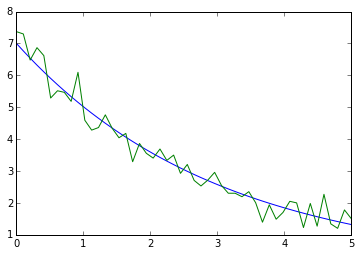

In [9]:
plt.plot(tdata, data_pure)
plt.plot(tdata, data_measure)

* Look for fit scipy module and fit

In [10]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(D, tdata, data_measure)

print (popt)
N_fit, tau_fit = popt
data_fit = D(tdata, N=N_fit, tau=tau_fit)

[ 7.14801215  2.89312668]


* plot result

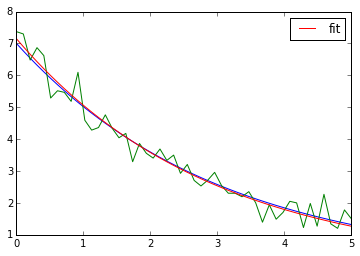

In [11]:
plt.plot(tdata, data_pure)
plt.plot(tdata, data_measure)
plt.plot(tdata, data_fit, label="fit")

plt.legend()

## Exercise: simple integration 

Calculate 

$$I = \int_0^\infty e^{-x} dx$$

hint: [GIYF](https://www.google.es/search?q=scipy%20integrate%20function&rct=j)

In [12]:
# %load files/sol_integ.py

In [13]:
#help(integrate)

## Real life example: solar activity period

Adapted from [Python for scientific use, Part II: Data analysis](http://linuxgazette.net/115/andreasen.html) 
by Anders Andreasen. See also a more modern approach to the subject using [Pandas](http://pandas.pydata.org/),  the Python Data Analysis Library, on [this Josh Hemann notebook](http://nbviewer.ipython.org/gist/jhemann/4569783)

In the next example we will use the Fast Fourier Transform (FFT) in order to transform time-dependent data into the frequency domain. By doing so, it is possible to analyse if any predominant frequencies exists - i.e. if there is any periodicity in the data. 

The example data we will use is the sunspot activity measurements from year 1700 to year 2014 provided by the Sunspot index and Long-term Solar Observation. The data set is the yearly mean total sunspot observations available via HTTP.

The datafile is also included in `files/SN_y_tot_V2.0.txt`. The sunspot data have been used for illustrating the power of FFT with respect to finding a periodicity in sunspot activity in various computer languages, e.g. Matlab and BASIC. 

### Retrieve data

Solar spot data are available online from the [datafiles section](http://www.sidc.be/silso/datafiles) of the Sunspot index and Long-term Solar Observation webpage. We will use the yearly mean total sunspot number [plain text version.]( versionhttp://www.sidc.be/silso/DATA/SN_y_tot_V2.0.txt)

A quick web search point us to the `urllib` python module and to a very simple retrival procedure.

In [14]:
import urllib
url = "http://www.sidc.be/silso/DATA/SN_y_tot_V2.0.txt"
raw_data = urllib.request.urlopen(url)
solarspots = np.loadtxt(raw_data)

In [15]:
solarspots
years = solarspots[:,0]
spots = solarspots[:,1]

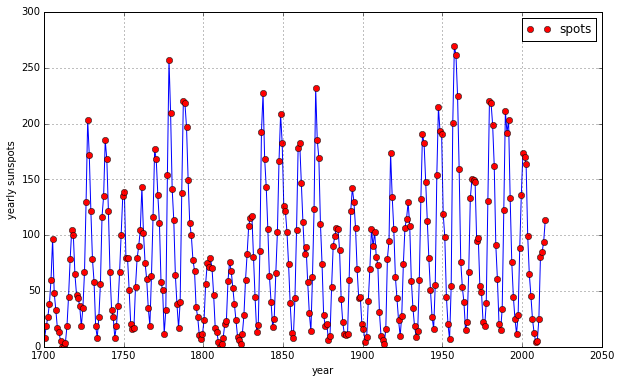

In [16]:
plt.figure(figsize=(10,6))

plt.plot(years, spots)
plt.plot(years, spots, "ro", label="spots" )

plt.xlabel("year")
plt.ylabel("yearly sunspots")
plt.legend()
plt.grid()

#plt.savefig("yearly_sunsports.png", dpi=300)

### FFT

Let's take a look at the [SciPy Fast Fourier Transform module manual](http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html), and straight from there...


In [17]:
from scipy.fftpack import fft, fftfreq

In [18]:
spots_fft = fft(spots)

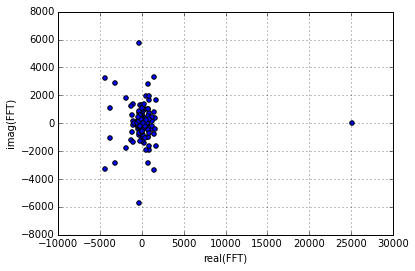

In [19]:
plt.scatter(spots_fft.real, spots_fft.imag)

#plt.xlim(-5000,5000)
plt.xlabel("real(FFT)")
plt.ylabel("imag(FFT)")
plt.grid()

In order to construct a periodogram, i.e. a graph of power vs. frequency, we first compute the power of the FFT signal which is simply the **FFT signal squared**. We only need the part of the signal ranging from zero to a frequency equal to the Nyquist frequency, which is equal to half the maximum frequency, since frequencies above the Nyquist frequency correspond to negative frequencies. The frequency range is calculated from 0-N/2 as N/(2T) where N is the number of samples and T is the sampling time.

In [20]:
N = spots_fft.size
timestep = 1 # year
freq = fftfreq(N, d=timestep)   # 1/year
power = np.abs(spots_fft)   # proportional to this

freq = freq[1:N/2]
power = power[1:N/2]

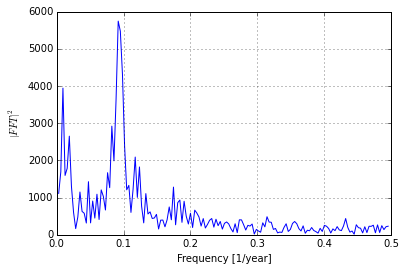

In [21]:
plt.plot(freq, power)

plt.xlabel("Frequency [1/year]")
plt.ylabel(r"$|FFT|^2$")
plt.grid()

Which in years becomes

In [22]:
period = 1./freq

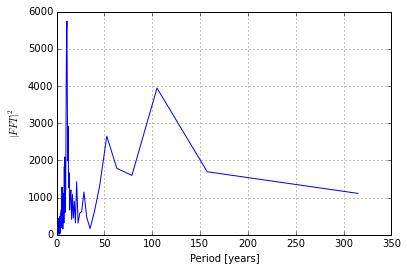

In [23]:
plt.plot(period, power)

plt.xlabel("Period [years]")
plt.ylabel(r"$|FFT|^2$")
plt.grid()

#plt.xlim( (0,30) )

### Solar spots period

In [24]:
max_power_index = np.argmax(power)
max_power_period = period[max_power_index]
print ('Maximum solar spots period is %1.2f years' %(max_power_period) )

Maximum solar spots period is 10.86 years


###Scipy direct method

After doing the exercise, while looking for information, I found that scipy allows us to directly compute the periodgram with [`scipy.signal.periodgram`](http://scipy.github.io/devdocs/generated/scipy.signal.periodogram.html)

(0.0, 0.5)

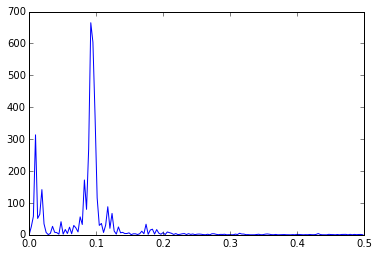

In [25]:
from scipy import signal
frec=1.  # sampling frequency: 1 year
f, Pxx_spectrum = signal.periodogram(spots, frec, scaling='spectrum')
plt.plot(f, Pxx_spectrum)
plt.xlim(.0,.5)

In [26]:
max_power_index = np.argmax(Pxx_spectrum)
max_power_period = 1./f[max_power_index]
print ('Maximum solar spots period is %1.2f years' %(max_power_period) )

Maximum solar spots period is 10.86 years


## Resources

* [SciPy Website](http://www.scipy.org)
* [SciPy Reference Documentation](http://docs.scipy.org/doc/scipy/reference/)
* [Python Scientific Lecture Notes](http://scipy-lectures.github.io/index.html), Edited by Valentin Haenel,
Emmanuelle Gouillart and Gaël Varoquaux.
* [Lectures on Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures), J.R. Johansson.
* [Introduction to Scientific Computing in Python](http://nbviewer.ipython.org/github/jakevdp/2014_fall_ASTR599/tree/master/), Jake Vanderplas.